### Mod 4 Code Review Discussion Multiple Linear Regression 


The data set that is being used has the following variables:
    
|  Variable |  Representation |
| --- | -- | 
| <div style="text-align: left"> date </div> | <div style="text-align: center"> date measurements were taken </div> |
| <div style="text-align: left"> age </div> | <div style="text-align: center"> age in years </div> |
| <div style="text-align: left"> body_wt </div> | <div style="text-align: center"> body weight in kg </div> |
| <div style="text-align: left"> chest_girth </div> | <div style="text-align: center"> chest girth in cm </div> |
| <div style="text-align: left"> body_len </div> | <div style="text-align: center"> length of body in cm </div> |



## Import the bear_statistics.csv file into a pandas dataframe

In [55]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import IPython.display as ipd
from statsmodels.formula.api import ols

# Import Data by reading the csv file
bears_df = pd.read_csv('bear_statistics_cleaned.csv')
print('Head of full data set')
print(bears_df.head())

Head of full data set
   order       date     sex   age  body_wt  chest_girth  body_len
0      9  8/11/2005  FEMALE  1.67    26.31         54.2     113.3
1      6  5/11/2004  FEMALE  1.42    27.22         59.0     127.0
2     11  8/31/2007  FEMALE  1.67    22.68         60.0     109.0
3    129  6/20/2007    MALE  1.50    32.21         62.0     131.0
4    151  9/28/2010    MALE  1.75    36.29         63.0     121.0


In [56]:
# create a new datafrom with only the columns we need
bears_df = bears_df[['sex','age','body_wt', 'chest_girth', 'body_len']]

In [57]:
# Create a new dataframe for only male bears
male_bears_df = bears_df[bears_df['sex']=='MALE']
print(male_bears_df.head())


     sex   age  body_wt  chest_girth  body_len
3   MALE  1.50    32.21         62.0     131.0
4   MALE  1.75    36.29         63.0     121.0
6   MALE  1.67    35.38         63.5     112.0
7   MALE  1.75    43.09         66.0     139.0
11  MALE  1.58    44.45         67.0     141.0


In [58]:
# Filter the male_bears_df for the specified age range
age_range_df = male_bears_df[(male_bears_df['age'] >= 7) & (male_bears_df['age'] <= 8.5)]

# Calculate the mean weight for the filtered records
mean_weight = age_range_df['body_wt'].mean()

print(f"The mean weight of male bears between the age of 7 and 8.5 is: {mean_weight:.2f} units")

The mean weight of male bears between the age of 7 and 8.5 is: 144.09 units


In [59]:
age_range_df.describe()

,age,body_wt,chest_girth,body_len
count,3.000000,3.000000,3.000000,3.000000
mean,7.636667,144.093333,118.333333,187.666667
std,0.172143,6.192983,3.785939,11.718931
min,7.500000,137.440000,114.000000,179.000000
25%,7.540000,141.295000,117.000000,181.000000
50%,7.580000,145.150000,120.000000,183.000000
75%,7.705000,147.420000,120.500000,192.000000
max,7.830000,149.690000,121.000000,201.000000


In [60]:
# Filter the male_bears_df for the specified chest girth range
chest_girth_range_df = male_bears_df[(male_bears_df['chest_girth'] >= 60) & (male_bears_df['chest_girth'] <= 70)]

# Calculate the mean weight for the filtered records
mean_weight = chest_girth_range_df['body_wt'].mean()

print(f"The mean weight of male bears with a chest girth between 60 and 70 is: {mean_weight:.2f} units")

The mean weight of male bears with a chest girth between 60 and 70 is: 38.74 units


In [61]:
# Filter the male_bears_df for the specified body length range
body_len_range_df = male_bears_df[(male_bears_df['body_len'] >= 130) & (male_bears_df['body_len'] <= 150)]

# Calculate the mean weight for the filtered records
mean_weight = body_len_range_df['body_wt'].mean()

print(f"The mean weight of male bears with a body length between 130 and 150 is: {mean_weight:.2f} units")

The mean weight of male bears with a body length between 130 and 150 is: 64.28 units


In [62]:
# Collect a random sample of 100 Male Bears
male_bears_df = male_bears_df.sample(n=100, random_state=1)

## Create scatter plots of chest girth vs body weight, age vs body weight, and body length vs body weight.   
### Create correlation coefficients and p-values for each of the three scatter plots.

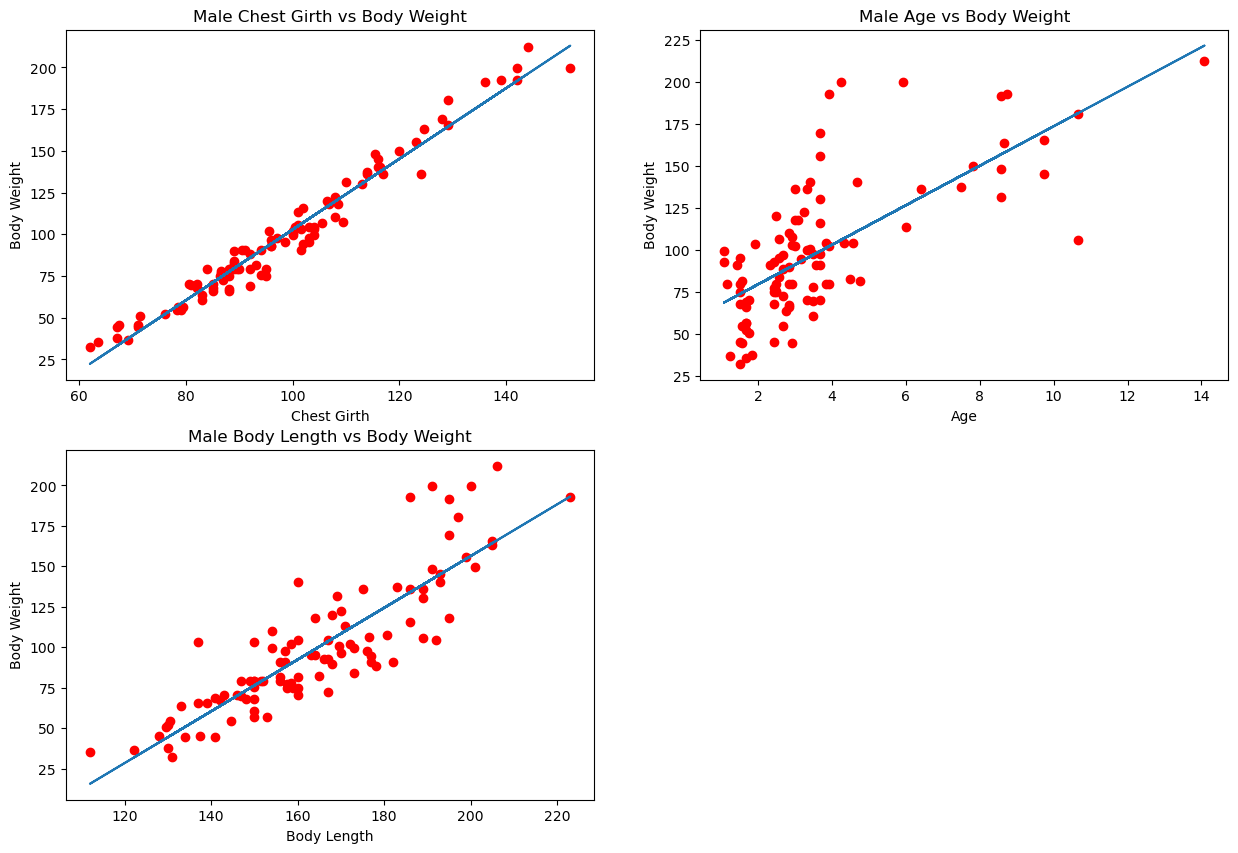

Correlation coefficients and p-values for each of the three scatter plots 

Chest Girth vs Body Weight
Correlation Coefficient:  0.9812
p-value:  0.0 

Age vs Body Weight
Correlation Coefficient:  0.7114
p-value:  0.0 

Body Length vs Body Weight
Correlation Coefficient:  0.8709
p-value:  0.0 



In [63]:
# Create scatter plots of chest girth vs body weight, age vs body weight, and body length vs body weight. 
y = male_bears_df['body_wt']

# Create the subplot figure
plt.figure(figsize=(15, 10))
plt.tight_layout()

# Create the first subplot of chest girth vs body weight
plt.subplot(2,2,1)
plt.scatter(male_bears_df['chest_girth'], y, color='red')
# Plot the regression line
x1 = male_bears_df['chest_girth']
y1 = male_bears_df['body_wt']
m1, b1 = np.polyfit(x1, y1, 1)
plt.plot(x1, m1*x1 + b1)
plt.xlabel('Chest Girth')
plt.ylabel('Body Weight')
plt.title('Male Chest Girth vs Body Weight')

# Create the second subplot of age vs body weight
plt.subplot(2,2,2)
plt.scatter(male_bears_df['age'], y, color='red')
# Plot the regression line
x2 = male_bears_df['age']
y2 = male_bears_df['body_wt']
m2, b2 = np.polyfit(x2, y2, 1)
plt.plot(x2, m2*x2 + b2)
plt.xlabel('Age')
plt.ylabel('Body Weight')
plt.title('Male Age vs Body Weight')

# Create the third subplot of body length vs body weight
plt.subplot(2,2,3)
plt.scatter(male_bears_df['body_len'], y, color='red')
# Plot the regression line
x3 = male_bears_df['body_len']
y3 = male_bears_df['body_wt']
m3, b3 = np.polyfit(x3, y3, 1)
plt.plot(x3, m3*x3 + b3)
plt.xlabel('Body Length')
plt.ylabel('Body Weight')
plt.title('Male Body Length vs Body Weight')

# Show the plots
plt.show()

# Create correlation coefficients and p-values for each of the three scatter plots
print('Correlation coefficients and p-values for each of the three scatter plots', '\n')
print('Chest Girth vs Body Weight')
corr1, p_value1 = st.pearsonr(male_bears_df['chest_girth'], male_bears_df['body_wt'])
print('Correlation Coefficient: ', round(corr1, 4))
print('p-value: ', round(p_value1, 4), '\n')

print('Age vs Body Weight')
corr2, p_value2 = st.pearsonr(male_bears_df['age'], male_bears_df['body_wt'])
print('Correlation Coefficient: ', round(corr2, 4))
print('p-value: ', round(p_value2, 4), '\n')

print('Body Length vs Body Weight')
corr3, p_value3 = st.pearsonr(male_bears_df['body_len'], male_bears_df['body_wt'])
print('Correlation Coefficient: ', round(corr3, 4))
print('p-value: ', round(p_value3, 4), '\n')



## Create a Simple Liner Regression Model to predict body weight given chest girth.

In [64]:
# Create a Simple Linear Regression Model to predict body weight from chest girth
model_1 = ols('body_wt ~ chest_girth', data = male_bears_df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                body_wt   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     2539.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           7.08e-72
Time:                        23:09:35   Log-Likelihood:                -347.31
No. Observations:                 100   AIC:                             698.6
Df Residuals:                      98   BIC:                             703.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -108.9762      4.200    -25.948      

## Create a Multiple Linear Regression Model to predict body weight given chest girth and age.

In [65]:
# Create the model
model_2 = ols('body_wt ~ chest_girth + age', data = male_bears_df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                body_wt   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1832.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           9.12e-78
Time:                        23:09:35   Log-Likelihood:                -329.05
No. Observations:                 100   AIC:                             664.1
Df Residuals:                      97   BIC:                             671.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -98.4716      3.866    -25.468      

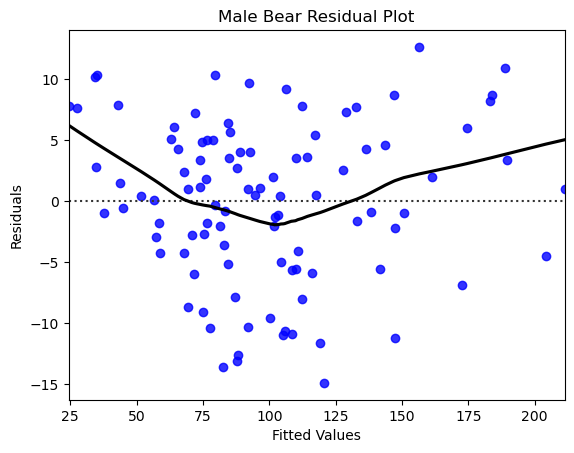

In [66]:
# create a residual plot for the model using chest girth and age and seaborn
sns.residplot(x = model_2.fittedvalues, y = model_2.resid, lowess = True, color = 'blue', line_kws={'color': 'black'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Male Bear Residual Plot')
plt.show()


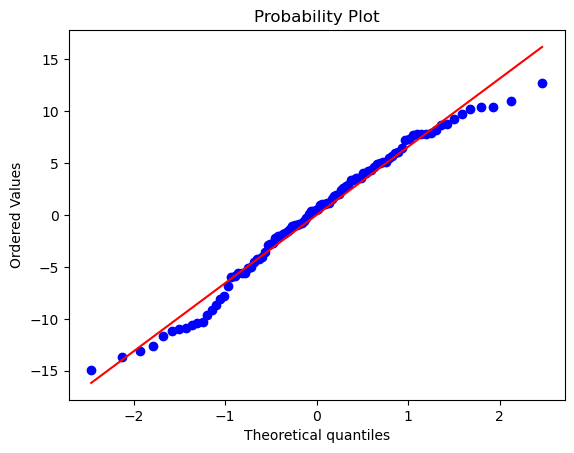

In [67]:
# Create a QQ plot for the model using chest girth and age
st.probplot(model_2.resid, dist = 'norm', plot = plt)

# Show the plot
plt.show()

In [68]:
# Create VIF for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Create the X and Y matrices for the model
y, X = dmatrices('body_wt ~ chest_girth + age', data=male_bears_df, return_type='dataframe')

# Calculate the VIF for each variable
vif = [variance_inflation_factor(X.values, i+1) for i in range(X.shape[1]-1)]
print('Variance Inflation Factors')
print(vif)

Variance Inflation Factors
[1.6997245262914205, 1.69972452629142]


## Step 2.f: Use the model to predict the body weight of a bear with a chest girth of 66 cm and an age of 4 years

In [69]:
# Predict the body weight of a bear with a chest girth of 66 and age of 4

# X values
x1 = 66
x2 = 7.5

# Y intercept and coefficients
b0 = -98.47
b1 = 1.93
b2 = 2.30

# Multiple Linear Regression Equation
y = b0 + b1*x1 + b2*x2

print("The expected weight of a male black bear with a chest girth of",x1,"and an age of", x2,"is", round(y,2),"kg", '\n')

The expected weight of a male black bear with a chest girth of 66 and an age of 7.5 is 46.16 kg 



## Create a Multiple Linear Regression Model to predict body weight given chest girth, age, and body length.

In [70]:
# Create the model
model_3 = ols('body_wt ~ chest_girth + age + body_len', data = male_bears_df).fit()

# Print the model summary
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                body_wt   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1276.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           3.48e-77
Time:                        23:09:35   Log-Likelihood:                -326.41
No. Observations:                 100   AIC:                             660.8
Df Residuals:                      96   BIC:                             671.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -108.0834      5.659    -19.099      

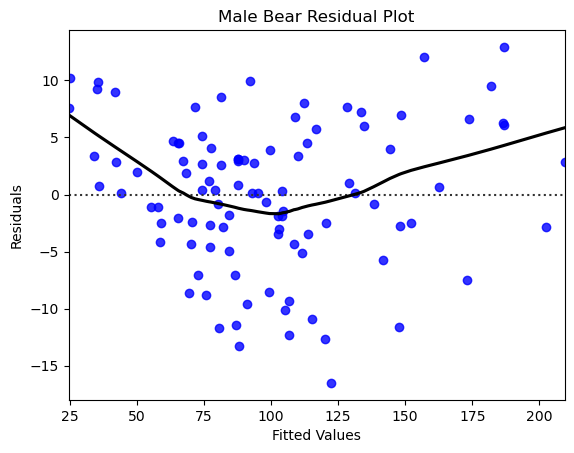

In [71]:
# create a residual plot for the model using chest girth and age and seaborn
sns.residplot(x = model_3.fittedvalues, y = model_3.resid, lowess = True, color = 'blue', line_kws={'color': 'black'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Male Bear Residual Plot')
plt.show()

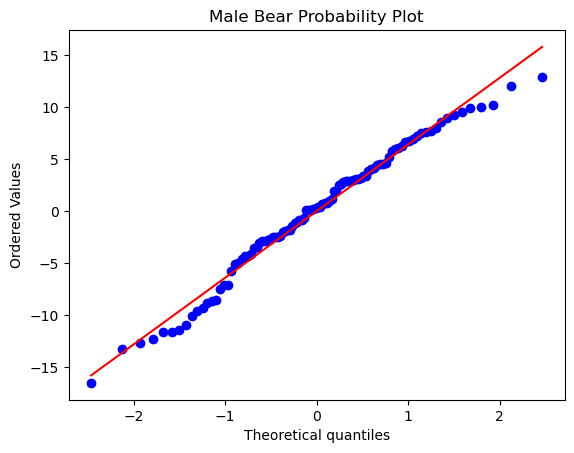

In [72]:
# Create a QQ plot for the model using chest girth and age
st.probplot(model_3.resid, dist = 'norm', plot = plt)

# Show the plot
plt.title('Male Bear Probability Plot')
plt.show()

## Predict body weight given a chest girth of 66 cm, an age of 4 years, and a body length of 135 cm.

In [73]:
# Predict the body weight of a bear with a chest girth of 66, age of 4, and body length of 135

# X values
x1 = 66
x2 = 7.5
x3 = 135

# Y intercept and coefficients male bears
b0 = -108.08
b1 = 1.81
b2 = 2.10
b3 = 0.13

# Multiple Linear Regression Equation Male Bears
y = b0 + b1*x1 + b2*x2 + b3*x3

print("The expected weight of a Black bear with a chest girth of",x1,"an age of",x2,"and a length of",x3,"is", round(y,2),"kg")

The expected weight of a Black bear with a chest girth of 66 an age of 7.5 and a length of 135 is 44.68 kg


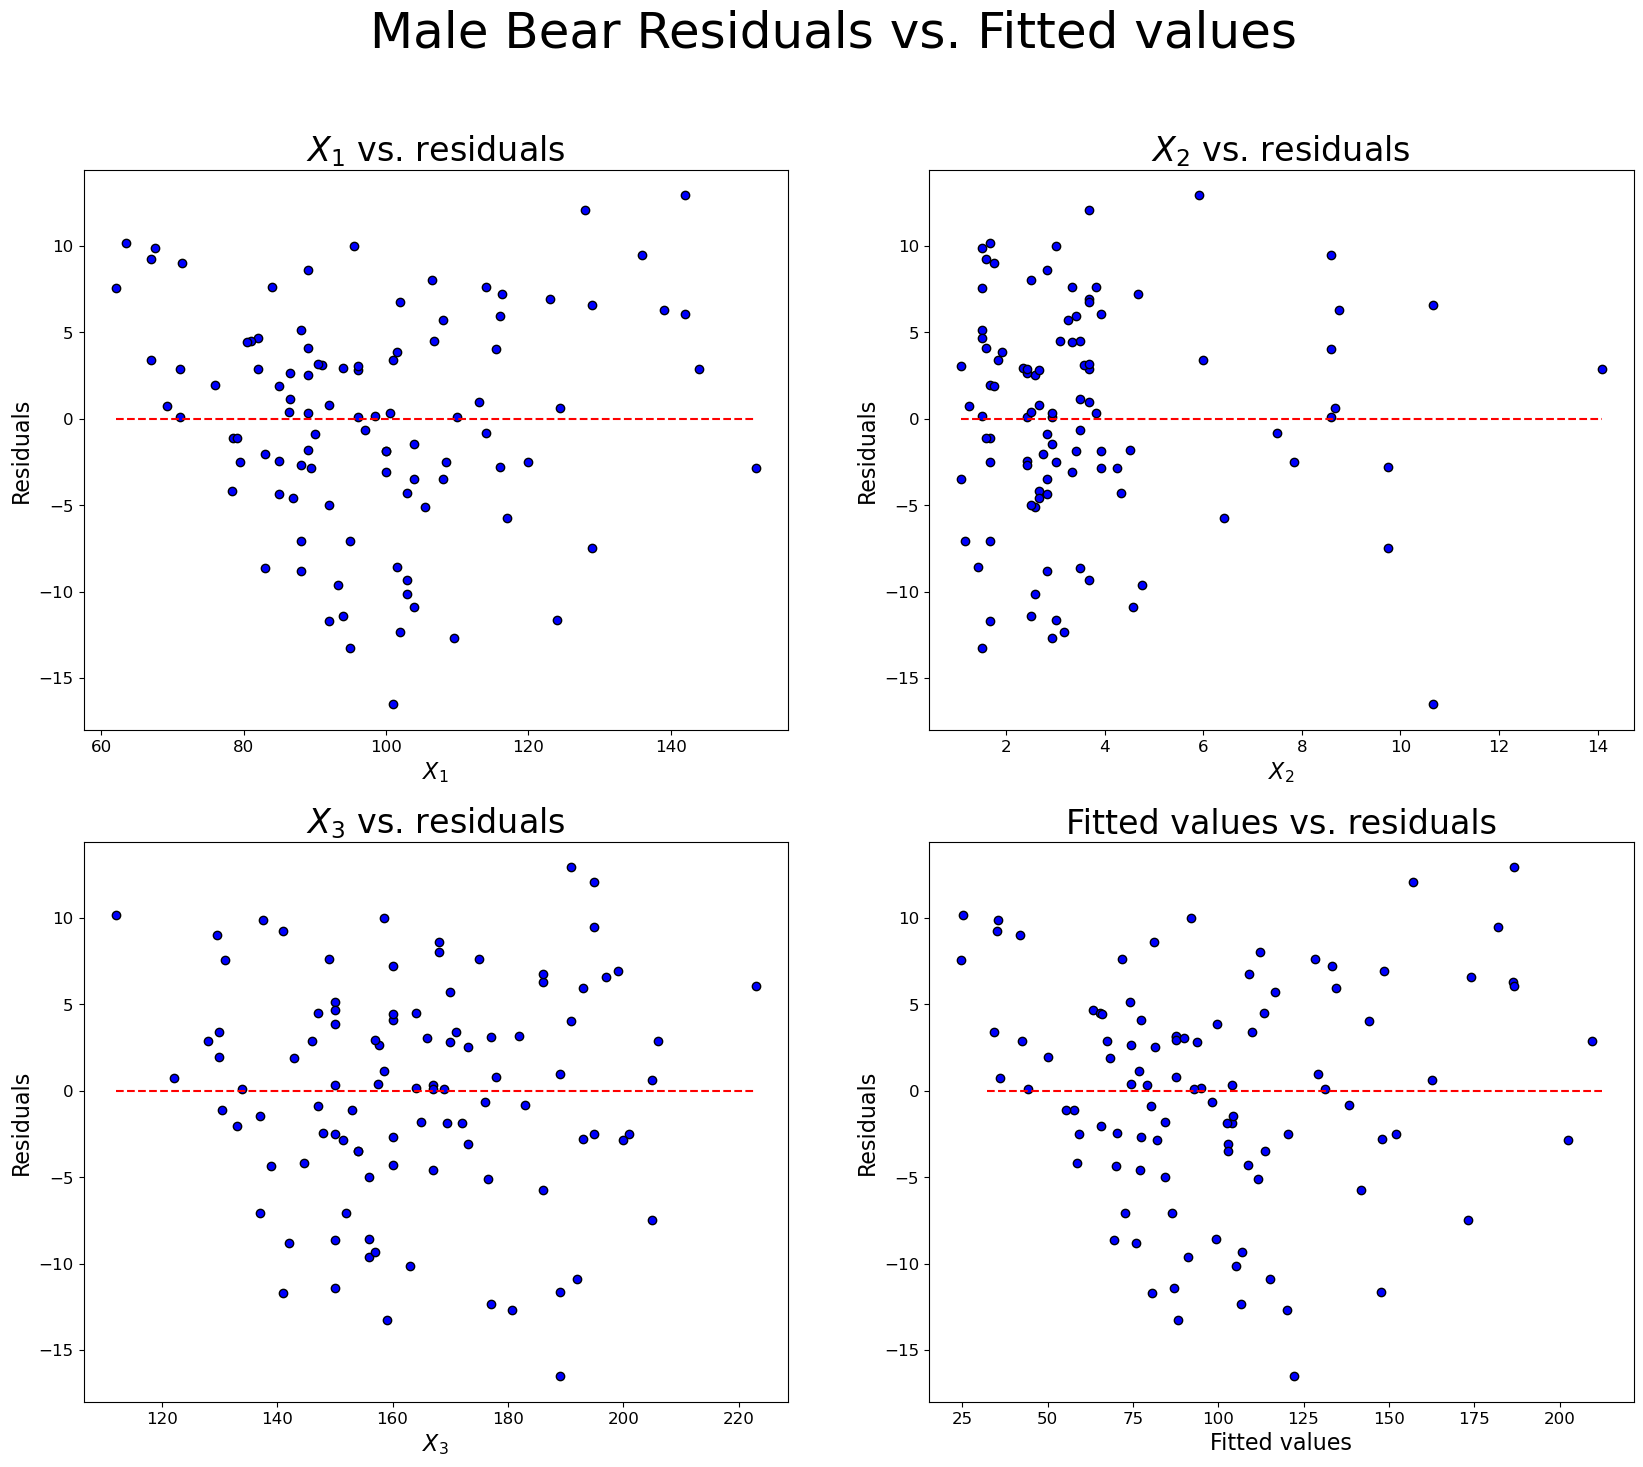

In [74]:
# Response variable
Y = male_bears_df['body_wt']


plt.figure(figsize = (20, 16))
plt.tight_layout()

plt.subplot(2, 2, 1)
plt.scatter(x = male_bears_df['chest_girth'], y = model_3.resid, color = 'blue', edgecolor = 'k')
xmin = min(male_bears_df['chest_girth'])
xmax = max(male_bears_df['chest_girth'])
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'red', linestyle = '--')
plt.xlabel('$X_1$', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('$X_1$ vs. residuals', fontsize = 24)

plt.subplot(2, 2, 2)
plt.scatter(x = male_bears_df['age'], y = model_3.resid, color = 'blue', edgecolor = 'k')
xmin = min(male_bears_df['age'])
xmax = max(male_bears_df['age'])
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'red', linestyle = '--')
plt.xlabel('$X_2$', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('$X_2$ vs. residuals', fontsize = 24)

plt.subplot(2, 2, 3)
plt.scatter(x = male_bears_df['body_len'], y = model_3.resid, color = 'blue', edgecolor = 'k')
xmin = min(male_bears_df['body_len'])
xmax = max(male_bears_df['body_len'])
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'red', linestyle = '--')
plt.xlabel('$X_3$', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('$X_3$ vs. residuals', fontsize = 24)

plt.subplot(2, 2, 4)
plt.scatter(x = model_3.fittedvalues, y = model_3.resid, color = 'blue', edgecolor = 'k')
xmin = min(Y)
xmax = max(Y)
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'red', linestyle = '--')
plt.xlabel('Fitted values', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Fitted values vs. residuals', fontsize = 24)

# add a figure title
plt.suptitle('Male Bear Residuals vs. Fitted values', fontsize = 36)

plt.show()



In [75]:
# Create VIF for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Create the X and Y matrices for the model
y, X = dmatrices('body_wt ~ chest_girth + age + body_len', data=male_bears_df, return_type='dataframe')

# Calculate the VIF for each variable
vif = [variance_inflation_factor(X.values, i+1) for i in range(X.shape[1]-1)]
print('Variance Inflation Factors')
print(vif)

Variance Inflation Factors
[3.928895926521203, 1.8044365968856109, 3.9538587580763345]


In [76]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Response variable 
Y = male_bears_df['body_wt']

# Create a new dataframe with the a dictionary of the predictor variables
new = pd.DataFrame({'chest_girth': [66], 'age': [7.5], 'body_len': [140]})
print(model_3.get_prediction(new, weights = 1).summary_frame(alpha = 0.01))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  45.707657  2.588912      38.903955      52.511359      27.41954   

   obs_ci_upper  
0     63.995774  


In [77]:

# Response variable 
Y = male_bears_df['body_wt']

# Create a new dataframe with the a dictionary of the predictor variables
new2 = pd.DataFrame({'chest_girth': [118.33], 'age': [7.5], 'body_len': [187.67]})
print(model_3.get_prediction(new2, weights = 1).summary_frame(alpha = 0.01))

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  146.709091  1.204325     143.544105     149.874077    129.441144   

   obs_ci_upper  
0    163.977038  
